#Trabajo Práctico 2- Entrega Final
##    NLP
###Desarrollo: Antonio Peroni

##Instalar dependencias

In [1]:
!pip install llama_index==0.9.38

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 15.9/15.9 MB 39.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 75.6/75.6 kB 8.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 227.4/227.4 kB 22.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.8/1.8 MB 61.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 77.8/77.8 kB 9.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 58.3/58.3 kB 7.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 49.4/49.4 kB 4.8 MB/s eta 0:00:00


In [2]:
!pip install gdown sentence-transformers pypdf2 langchain python-decouple chromadb spacy tensorflow tensorflow_text unidecode python-dotenv scikit-learn  rdflib spacy networkx
!python -m spacy download es_core_news_sm

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 156.5/156.5 kB 1.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 232.6/232.6 kB 4.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 817.0/817.0 kB 13.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 525.5/525.5 kB 27.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.2/5.2 MB 17.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 235.5/235.5 kB 22.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 531.9/531.9 kB 40.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.7/1.7 MB 42.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 252.4/252.4 kB 19.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 63.1/63.1 kB 6.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.4/2.4 MB 53.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 92.1/92.1 kB 7.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━

##Recoleccion de datos

In [3]:
# Obtenemos los archivos que usaremos como fuente de conocimiento
import gdown
import os
import shutil

# Link datos instrumentacion
url = 'https://drive.google.com/drive/folders/1QYAFO54ELsdy3A8FTP0xW-2KtCIdHuXE?usp=sharing'
# Link datos comunicacion txt, dataframe stock, logs.env
url1 = 'https://drive.google.com/drive/folders/1vUZoxAyCeChrmgvmictQ65k8C4FWI32q?usp=sharing'

# Descarga carpeta
gdown.download_folder(url, quiet=True, output='data')
gdown.download_folder(url1, quiet=True, output='other')

# Crear la carpeta 'llamaindex_data' si no existe
carpeta_destino = 'llamaindex_data'
if not os.path.exists(carpeta_destino):
    os.makedirs(carpeta_destino)
destino = '/content'

# Mover todos los archivos de 'data' a 'llamaindex_data'
carpeta_origen = 'data'
for filename in os.listdir(carpeta_origen):
    ruta_origen = os.path.join(carpeta_origen, filename)
    ruta_destino = os.path.join(carpeta_destino, filename)
    shutil.move(ruta_origen, ruta_destino)
# Mover todos los archivos de 'data' a 'content'
carpeta_origen1 = 'other'
for filename in os.listdir(carpeta_origen1):
    ruta_origen1 = os.path.join(carpeta_origen1, filename)
    ruta_destino = os.path.join(destino, filename)
    shutil.move(ruta_origen1, ruta_destino)


# Eliminar la carpetas vacias
shutil.rmtree(carpeta_origen)
shutil.rmtree(carpeta_origen1)

print("Archivos movidos con éxito.")

Archivos movidos con éxito.


In [4]:
#KEY
from decouple import config
import openai
from dotenv import load_dotenv
load_dotenv()

openai.api_key =config("OPENAI_API_KEY")
api_key = config('HUGGINGFACE_TOKEN')

## Embedding

In [5]:
from langchain.embeddings import HuggingFaceEmbeddings
from llama_index.embeddings.langchain import LangchainEmbedding

models = HuggingFaceEmbeddings(model_name='sentence-transformers/paraphrase-multilingual-mpnet-base-v2')
embeddings = LangchainEmbedding(models)


/usr/local/lib/python3.10/dist-packages/huggingface_hub/utils/_token.py:88: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


modules.json:   0%|          | 0.00/229 [00:00<?, ?B/s]

config_sentence_transformers.json:   0%|          | 0.00/122 [00:00<?, ?B/s]

README.md:   0%|          | 0.00/4.13k [00:00<?, ?B/s]

sentence_bert_config.json:   0%|          | 0.00/53.0 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/723 [00:00<?, ?B/s]

pytorch_model.bin:   0%|          | 0.00/1.11G [00:00<?, ?B/s]

/usr/local/lib/python3.10/dist-packages/torch/_utils.py:831: UserWarning: TypedStorage is deprecated. It will be removed in the future and UntypedStorage will be the only storage class. This should only matter to you if you are using storages directly.  To access UntypedStorage directly, use tensor.untyped_storage() instead of tensor.storage()
  return self.fget.__get__(instance, owner)()


tokenizer_config.json:   0%|          | 0.00/402 [00:00<?, ?B/s]

sentencepiece.bpe.model:   0%|          | 0.00/5.07M [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/9.08M [00:00<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/239 [00:00<?, ?B/s]

1_Pooling/config.json:   0%|          | 0.00/190 [00:00<?, ?B/s]

In [6]:
from langchain.text_splitter import RecursiveCharacterTextSplitter

# iniciar el splitter y embeddings
text_splitter = RecursiveCharacterTextSplitter(chunk_size=1000, chunk_overlap=100)

##Base vectorial

In [7]:
#crear base vectorial
import os
import PyPDF2
import chromadb

# iniciar base como cliente
client = chromadb.PersistentClient(path="/content/")
collection = client.create_collection(name="instrumentacion")


In [8]:
import string

# convertir pdf a texto
def pdf_to_text(file_path):
    pdf_file = open(file_path, 'rb')
    pdf_reader = PyPDF2.PdfReader(pdf_file)
    text = ""
    for page_num in range( len(pdf_reader.pages)):
        text += pdf_reader.pages[page_num].extract_text()
    pdf_file.close()
    return text

for filename in os.listdir('/content/llamaindex_data'):
    if filename.endswith('.pdf'):
        # Convert PDF to text
        text = pdf_to_text(os.path.join('/content/llamaindex_data', filename))
        # Convertir a minúsculas
        text = text.lower()
       # Eliminar la puntuación utilizando translate()
        text = text.translate(str.maketrans('', '', string.punctuation))
        # Split text into chunks
        chunks = text_splitter.split_text(text)

        # Convert chunks to vector representations and store in Chroma DB
        documents_list = []
        embeddings_list = []
        ids_list = []

        for i, chunk in enumerate(chunks):
            vector = embeddings.get_text_embedding(chunk)

            documents_list.append(chunk)
            embeddings_list.append(vector)
            ids_list.append(f"{filename}_{i}")


        collection.add(
            embeddings=embeddings_list,
            documents=documents_list,
            ids=ids_list
        )


In [9]:
import chromadb
from langchain.embeddings import HuggingFaceEmbeddings

# Initialize Chroma DB client
client = chromadb.PersistentClient(path="/content/")
collection = client.get_collection(name="instrumentacion")

def query_chroma(query):
  # Convert query to vector representation
  query_vector = embeddings.get_text_embedding(query)

  # Query Chroma DB with the vector representation
  results = collection.query(query_embeddings=query_vector, n_results=2, include=["documents"] )

  # Print results
  for result in results["documents"]:
      for i in result:
          print(i)


In [10]:
print(query_chroma('¿que es histeresis?'))

416  histéresis hysteresis 
 
la histéresis es la diferencia máxima que se observa en los valores indicados por el índice o la 
pluma del instrumento para el mismo valor cualqu iera del campo de medida cuando la variable 
recorre toda la escala en los dos sentidos ascendente y descendente 
se expresa en tanto por ciento del alcance de la medida por ejemplo si en el instrumento de la figura 43 c es de ± 03  su valor será de ± 03  de 200 °c  ± 06 °c en la figura 43 c 
pueden verse las curvas de histéresis que están dibujadas exageradamente para apreciar bien su forma hay que señalar que el término zona muerta está incluido dentro de la histéresis 
  
417  función de transferencia 
 
es la relación matemática gráfica o tabular entre las expresiones función de tiempo de las señales 
de salida y de entrada a un sistema o elemento equi vale también al cociente de las transformadas 
de laplace de las funciones de respuesta y de excitación universidad de oriente
tubería 
 universidad de orient

##Grafo

rehacer - crear base- graficar- buscar sobre grafo con palabra clave. sparql-

In [11]:
import pandas as pd

# Cargar el conjunto de datos
dfg = pd.read_csv('variables.csv', delimiter=";")
dfg=dfg.dropna()

In [12]:
from rdflib import Graph, Literal, Namespace, URIRef

# Definir espacios de nombres
t = Namespace("http://example.org/Nombre/")
d = Namespace("http://example.org/Descripcion/")
ti = Namespace("http://example.org/Tipo/")

# Crear un grafo RDF
g = Graph()


# Iterar sobre las filas del DataFrame para crear las tripletas RDF y agregarlas al grafo
for index, row in dfg.iterrows():
    tag_uri = (t[row['Nombre']])
    g.add((tag_uri, d.Nombre, Literal(row['Nombre'])))
    g.add((tag_uri, d.Descripcion, Literal(row['Descripcion'])))
    g.add((tag_uri, ti.Tipo, Literal(row['Tipo'])))

#print(g.serialize(format="turtle"))

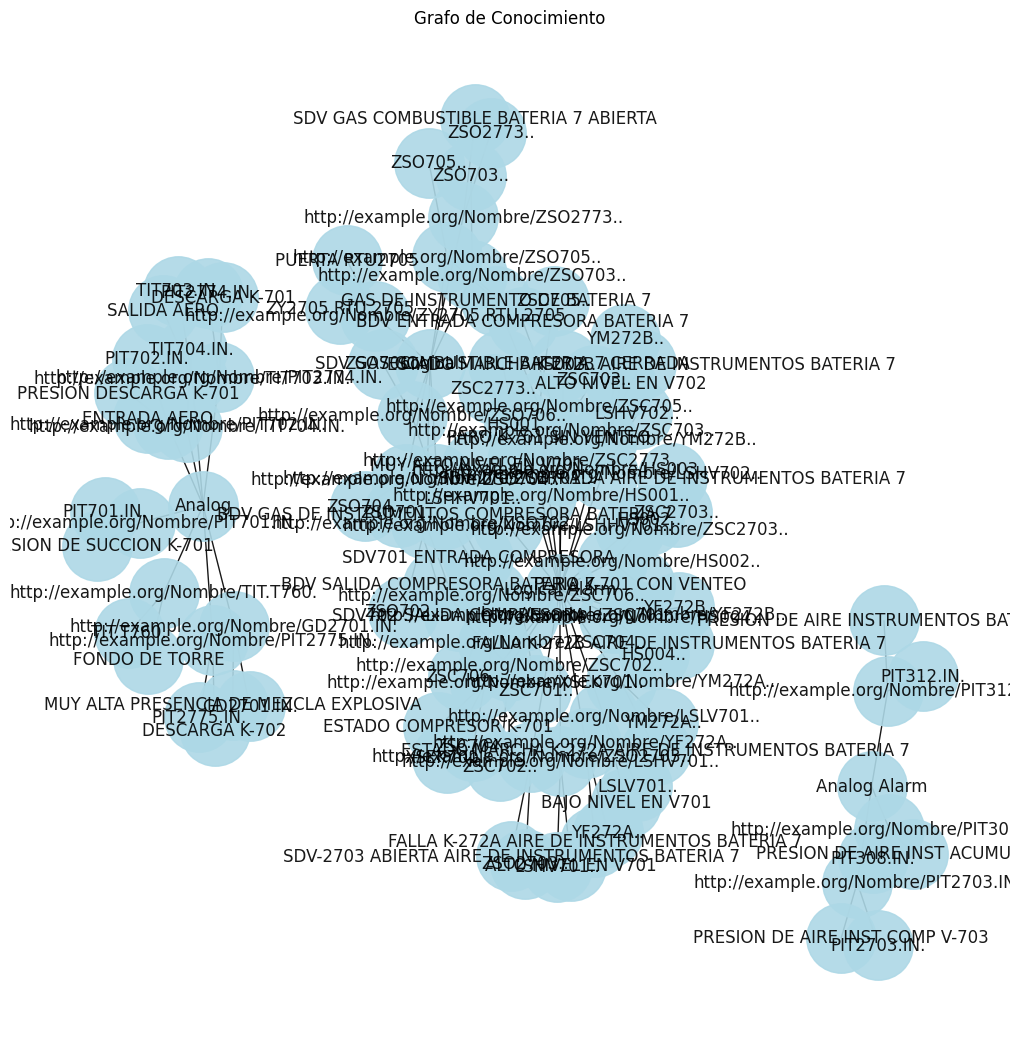

In [13]:
import matplotlib.pyplot as plt
import networkx as nx
from rdflib import Graph, Literal, Namespace

# Convertir el grafo RDF a un grafo de networkx
nxg = nx.Graph()

for subj, pred, obj in g:
    nxg.add_node(subj)
    nxg.add_node(obj)
    nxg.add_edge(subj, obj, label=pred)

# Definir un tamaño de figura
plt.figure(figsize=(10, 10))

# Dibujar el grafo
pos = nx.spring_layout(nxg)
nx.draw(nxg, pos, with_labels=True, node_size=2500, node_color='lightblue', alpha=0.9)

plt.title('Grafo de Conocimiento')
plt.show()


In [14]:
def query_grafo(palabras):
  # Definir espacios de nombres
  ns1 = Namespace("http://example.org/Tipo/")
  ns2 = Namespace("http://example.org/Descripcion/")

  palabra = palabras.split(", ")

  language_variable = (palabra[2])
  acorde= (palabra[1])

  #grafo, nombre, ZSO706..
  # Definir la consulta SPARQL
  if acorde=="descripcion":
    desc = """
    SELECT ?Nombre ?Descripcion ?Tipo
    WHERE {
        ?s ns2:Nombre ?Nombre .
        ?s ns2:Descripcion ?Descripcion .
        ?s ns1:Tipo ?Tipo .
        FILTER(?Descripcion = '%s')
    }
    """ % language_variable
      # Ejecutar la consulta SPARQL en el grafo RDF
    results = g.query(desc, initNs={"ns1": ns1, "ns2": ns2})
    # Inicializa una cadena de texto vacía para almacenar los resultados
    resultado_str = ""
    # Itera sobre los resultados y agrega cada fila al resultado_str
    for row in results:
        resultado_str += f"Nombre: {row['Nombre']}, Descripción: {row['Descripcion']}, Tipo: {row['Tipo']}\n"
    # Retorna la cadena de texto resultante
    return resultado_str
  elif acorde =="nombre":
    print('buscando nombre')
    nomb ="""
    SELECT ?Nombre ?Descripcion ?Tipo
    WHERE {
        ?s ns2:Nombre ?Nombre .
        ?s ns2:Descripcion ?Descripcion .
        ?s ns1:Tipo ?Tipo .
        FILTER(?Nombre = '%s')
    }
    """ % language_variable
      # Ejecutar la consulta SPARQL en el grafo RDF
    results = g.query(nomb, initNs={"ns1": ns1, "ns2": ns2})
    # Inicializa una cadena de texto vacía para almacenar los resultados
    resultado_str = ""
    # Itera sobre los resultados y agrega cada fila al resultado_str
    for row in results:
        resultado_str += f"Nombre: {row['Nombre']}, Descripción: {row['Descripcion']}, Tipo: {row['Tipo']}\n"
    # Retorna la cadena de texto resultante
    return resultado_str


  elif acorde =="tipo":
    tipo ="""
    SELECT ?Nombre ?Descripcion ?Tipo
    WHERE {
        ?s ns2:Nombre ?Nombre .
        ?s ns2:Descripcion ?Descripcion .
        ?s ns1:Tipo ?Tipo .
        FILTER(?Tipo = '%s')
    }
    """ % language_variable
    # Inicializa una cadena de texto vacía para almacenar los resultados
    resultado_str = ""
    # Itera sobre los resultados y agrega cada fila al resultado_str
    for row in results:
        resultado_str += f"Nombre: {row['Nombre']}, Descripción: {row['Descripcion']}, Tipo: {row['Tipo']}\n"
    # Retorna la cadena de texto resultante
    return resultado_str


##Datos Tabulares

In [15]:
import pandas as pd

# Cargar el conjunto de datos
df = pd.read_csv('base_it.csv', delimiter=";")
df=df.dropna()


In [16]:
# Obtener los valores únicos de la columna 'Marca', 'tipo' y 'Zona'
marcas = df['Marca'].unique()
tipos = df['tipo'].unique()
zonas = df['Zona'].unique()

# Inicializar un diccionario vacío
dicc = {'marca': list(marcas), 'tipo': list(tipos), 'zona': list(zonas)}

# Imprimir el diccionario
print(dicc)

{'marca': ['cisco', 'rockwell', 'emerson', 'ruggedcom'], 'tipo': ['switch2', 'hub', 'router', 'switch3', 'repetidor'], 'zona': ['zonas_a', 'zonas_b', 'zonas_d', 'zonas_c']}


In [17]:
# Convertir el DataFrame en str
def dataframe_to_string(df):
    result = ""
    for index, row in df.iterrows():
        result += f"Marca: {row['Marca']} "
        result += f"Tipo: {row['tipo']} "
        result += f"Ventas: {row['ventas']} "
        result += f"Zona: {row['Zona']},"
        result += "\n"

    return result


In [18]:
def query_dataframe(query):
    # Inicializar la lista de claves encontradas como vacía
    claves_encontradas = []
    # Convertir a minúsculas
    query = query.lower()
    # Iterar sobre los elementos del diccionario
    for clave, valores in dicc.items():
        for palabra in query.split():  # Dividir la frase en palabras
            if palabra in valores:
                # Si se encuentra, almacenar la clave correspondiente
                claves_encontradas.append((clave, palabra))

    # Inicializar el contexto
    contexto = None

    # Realizar la consulta con las variables filtradas
    df_query = df.copy()

    if claves_encontradas:
        for clave, palabra in claves_encontradas:
          if clave == 'marca':
            df_query = df_query.query(f"Marca == '{palabra}'")
          elif clave == 'tipo':
            df_query = df_query.query(f"tipo == '{palabra}'")
          elif clave == 'zona':
            df_query = df_query.query(f"Zona == '{palabra}'")
        for clave in claves_encontradas:
          if clave == 'tipo':
            df_query = df_query.query(f"tipo == '{palabra}'")
          elif clave == 'zona':
            df_query = df_query.query(f"Zona == '{palabra}'")
        for clave in claves_encontradas:
          if clave == 'zona':
            df_query = df_query.query(f"Zona == '{palabra}'")

            # Convertir el DataFrame filtrado en contexto
        contexto = dataframe_to_string(df_query)
           # break  # Detener el bucle después de encontrar la primera coincidencia

    return contexto


In [19]:
contexto_data = query_dataframe('cuantos router cisco se vendieron?')
print(contexto_data)

Marca: cisco Tipo: router Ventas: 42.0 Zona: zonas_a,
Marca: cisco Tipo: router Ventas: 19.0 Zona: zonas_d,
Marca: cisco Tipo: router Ventas: 53.0 Zona: zonas_c,
Marca: cisco Tipo: router Ventas: 64.0 Zona: zonas_b,



##Clasificador

In [20]:
import re
def zephyr_chat_template(messages, add_generation_prompt=True):
    # Definir la plantilla Jinja
    template_str  = "{% for message in messages %}"
    template_str += "{% if message['role'] == 'user' %}"
    template_str += "<|user|>{{ message['content'] }}</s>\n"
    template_str += "{% elif message['role'] == 'assistant' %}"
    template_str += "<|assistant|>{{ message['content'] }}</s>\n"
    template_str += "{% elif message['role'] == 'system' %}"
    template_str += "<|system|>{{ message['content'] }}</s>\n"
    template_str += "{% else %}"
    template_str += "<|unknown|>{{ message['content'] }}</s>\n"
    template_str += "{% endif %}"
    template_str += "{% endfor %}"
    template_str += "{% if add_generation_prompt %}"
    template_str += "<|assistant|>\n"
    template_str += "{% endif %}"

    # Crear un objeto de plantilla con la cadena de plantilla
    template = Template(template_str)

    # Renderizar la plantilla con los mensajes proporcionados
    return template.render(messages=messages, add_generation_prompt=add_generation_prompt)



# Aquí hacemos la llamada el modelo
def tag(prompt: str, max_new_tokens: int = 768) -> None:
    messages: List[Dict[str, str]] = [
                                 {"role": "system", "content": """Eres un asistente que se encarga de identificar la fuente correcta de datos.
            Debes responder obligatoriamente de la siguiente manera sin agregar información extra o de conocimiento previo:

            (instrumentacion,) si la pregunta es sobre: instrumentos, sensores, transmisores.
            (grafo, [nombre del elemento]) si la pregunta es sobre identificar nombres desde una descripción o tipo.
            (stock,) si la pregunta es sobre: cantidad de ventas, ventas de zona a, ventas de zona b, ventas de zona c, ventas de zona d, elementos de comunicación de redes.
            """},

            {"role": "user", "content": "¿Cuál es la precisión del sensor de temperatura?"},
            {"role": "assistant", "content": "(instrumentacion)"},

            {"role": "user", "content": "¿Cómo se calibra un transmisor de presión?"},
            {"role": "assistant", "content": "(instrumentacion)"},

            {"role": "user", "content": "¿Qué es un termopar y cómo funciona?"},
            {"role": "assistant", "content": "(instrumentacion)"},

            {"role": "user", "content": "¿Cuál es la diferencia entre un sensor de proximidad inductivo y un sensor capacitivo?"},
            {"role": "assistant", "content": "(instrumentacion)"},

            {"role": "user", "content": "¿Cómo se realiza la compensación de temperatura en un termómetro de resistencia?"},
            {"role": "assistant", "content": "(instrumentacion)"},

            {"role": "user", "content": "¿Que es histeresis?"},
            {"role": "assistant", "content": "(instrumentacion)"},

            {"role": "user", "content": "¿Qué parámetros se pueden medir con un transmisor de nivel ultrasónico?"},
            {"role": "assistant", "content": "(instrumentacion)"},

            {"role": "user", "content": "¿Cómo se selecciona el rango de operación de un sensor de presión?"},
            {"role": "assistant", "content": "(instrumentacion)"},

            {"role": "user", "content": "¿Cuántos router cisco se vendieron?"},
            {"role": "assistant", "content": "(stock)"},

            {"role": "user", "content": "Las ventas de switchs cisco en zona a fueron de 46."},
            {"role": "assistant", "content": "(stock)"},

            {"role": "user", "content": "¿las zonas con mas venta?"},
            {"role": "assistant", "content": "(stock)"},

            {"role": "user", "content": "¿ventas de switch2 rockwell?"},
            {"role": "assistant", "content": "(stock)"},

            {"role": "user", "content": "cual es el nombre de la señal que tiene como descripcion PARO K-701 SIN VENTEO"},
            {"role": "assistant", "content": "(grafo, descripcion, PARO K-701 SIN VENTEO)"},

            {"role": "user", "content": "Cual es al descripcion del tag ZSO706.. ?"},
            {"role": "assistant", "content": "(grafo, nombre, ZSO706..)"},

            {"role": "user", "content": "Cual es al descripcion del tag HS001 ?"},
            {"role": "assistant", "content": "(grafo, nombre, HS001)"},

            {"role": "user", "content": "nombre de la señal con descripcion PARO K-701 SIN VENTEO BDV ENTRADA COMPRESORA BATERIA 7"},
            {"role": "assistant", "content": "(grafo, descripcion, PARO K-701 SIN VENTEO BDV ENTRADA COMPRESORA BATERIA 7)"},

            {"role": "user", "content": "Cuales son las señales del tipo Analog ?"},
            {"role": "assistant", "content": "(grafo, tipo, Analog)"},

            {"role": "user", "content": "Cuales son las señales del tipo Logical Alarm ?"},
            {"role": "assistant", "content": "(grafo, tipo, Logical Alarm)"},

            {"role": "user", "content": prompt}
                              ]


    try:
        api_key = config('HUGGINGFACE_TOKEN')
        prompt_formatted: str = zephyr_chat_template(messages, add_generation_prompt=True)

        # URL de la API de Hugging Face para la generación de texto
        api_url = "https://api-inference.huggingface.co/models/HuggingFaceH4/zephyr-7b-beta"

        # Cabeceras para la solicitud
        headers = {"Authorization": f"Bearer {api_key}"}

        # Datos para enviar en la solicitud POST
				# Sobre los parámetros: https://huggingface.co/docs/transformers/main_classes/text_generation
        data = {
            "inputs": prompt_formatted,
            "parameters": {
                "max_new_tokens": max_new_tokens,
                "temperature": 0.7,
                "top_k": 50,
                "top_p": 0.95
            }
        }

        # Realizamos la solicitud POST
        response = requests.post(api_url, headers=headers, json=data)
        #print(response.json())
        # Extraer respuesta
        respu = response.json()[0]["generated_text"][len(prompt_formatted):]
        respuesta = re.search(r'\((.*?)\)', respu).group(1)
        return respuesta

    except Exception as e:
        print(f"An error occurred: {e}")


In [21]:
def contexto(etiqueta, prompt):
    palabras = etiqueta.split(", ")
    #"Base de datos vectorial"
    if str(palabras[0]) == "instrumentacion":
      print('chroma')
      chroma = query_chroma(prompt)
      return (chroma )
    #'Base de datos de grafos'
    elif str(palabras[0]) == "grafo":
     print('grafo')
     grafo= query_grafo(etiqueta)
     return (grafo)
     #dataframe= dataframe_to_string( prompt)
    elif str(palabras[0]) == "stock":
      print('stock')
      dataframe = query_dataframe(prompt)
      return (dataframe)# 'Dataframe'
    else:
      print("Lo siento, no tengo una respuesta para tu pregunta")


##RAG

In [22]:
from llama_index import ServiceContext
from llama_index import VectorStoreIndex, SimpleDirectoryReader
from jinja2 import Template
import requests
from decouple import config
from llama_index.storage.storage_context import StorageContext
from llama_index.vector_stores.chroma import ChromaVectorStore

In [23]:
def zephyr_instruct_template(messages, add_generation_prompt=True):
    # Definir la plantilla Jinja
    template_str = "{% for message in messages %}"
    template_str += "{% if message['role'] == 'user' %}"
    template_str += "<|user|>{{ message['content'] }}</s>\n"
    template_str += "{% elif message['role'] == 'assistant' %}"
    template_str += "<|assistant|>{{ message['content'] }}</s>\n"
    template_str += "{% elif message['role'] == 'system' %}"
    template_str += "<|system|>{{ message['content'] }}</s>\n"
    template_str += "{% else %}"
    template_str += "<|unknown|>{{ message['content'] }}</s>\n"
    template_str += "{% endif %}"
    template_str += "{% endfor %}"
    template_str += "{% if add_generation_prompt %}"
    template_str += "<|assistant|>\n"
    template_str += "{% endif %}"

    # Crear un objeto de plantilla con la cadena de plantilla
    template = Template(template_str)

    # Renderizar la plantilla con los mensajes proporcionados
    return template.render(messages=messages, add_generation_prompt=add_generation_prompt)


# Aquí hacemos la llamada el modelo
def generate_answer(prompt: str, max_new_tokens: int = 768) -> None:
    try:
        # Tu clave API de Hugging Face
        api_key = config('HUGGINGFACE_TOKEN')

        # URL de la API de Hugging Face para la generación de texto
        api_url = "https://api-inference.huggingface.co/models/HuggingFaceH4/zephyr-7b-beta"

        # Cabeceras para la solicitud
        headers = {"Authorization": f"Bearer {api_key}"}

        # Datos para enviar en la solicitud POST
        # Sobre los parámetros: https://huggingface.co/docs/transformers/main_classes/text_generation
        data = {
            "inputs": prompt,
            "parameters": {
                "max_new_tokens": max_new_tokens,
                "temperature": 0.7,
                "top_k": 50,
                "top_p": 0.95
            }
        }

        # Realizamos la solicitud POST
        response = requests.post(api_url, headers=headers, json=data)

        # Extraer respuesta
        respuesta = response.json()[0]["generated_text"][len(prompt):]
        return respuesta

    except Exception as e:
        print(f"An error occurred: {e}")

# Esta función prepara el prompt en estilo QA
def prepare_prompt(query_str: str, context_str: list):
  TEXT_QA_PROMPT_TMPL = (
      "La información de contexto es la siguiente:\n"
      "---------------------\n"
      "{context_str}\n"
      "---------------------\n"
      "Dada la información de contexto anterior, y sin utilizar conocimiento previo, responde la siguiente pregunta.\n"
      "Pregunta: {query_str}\n"
      "Respuesta: "
  )

  messages = [
      {
          "role": "system",
          "content": "Eres un asistente útil que siempre responde con respuestas veraces, útiles y basadas en hechos.",
      },
      {"role": "user", "content": TEXT_QA_PROMPT_TMPL.format(context_str=context_str, query_str=query_str)},
  ]

  final_prompt = zephyr_instruct_template(messages)
  return final_prompt


In [24]:
def respuesta_final(prompt):
  etiqueta = tag(prompt)
  print('Etiqueta:')
  print(etiqueta)
  print('-------------------------------------------------------')
  print('Contexto:')
  contexto_data = contexto(etiqueta,prompt)
  print(contexto_data)
  print('-------------------------------------------------------')
  final_prompt = prepare_prompt(prompt, contexto_data)
  print('Respuesta:')
  print(generate_answer(final_prompt))
  print('-------------------------------------------------------')


##Generar respuestas

In [25]:
# instrumentacion de chroma
prompt = '¿Que es histeresis?'
respuesta_final(prompt)

Etiqueta:
instrumentacion
-------------------------------------------------------
Contexto:
chroma
tubería 
 universidad de oriente 
escuela de ingenieria y ciencias aplicadas – postgrado en ingeniería electrica 
página 166  
especialización en automatización e informática 
 
prof omar bustillos ponte  civ 12549 archivo instrumentación industrial ob 
 
•    medidor de flujo tipo torbellino vortex  básicamente este tipo de medidor esta 
constituido por un objeto en forma de barra que se  coloca dentro de la tubería para obstruir el 
flujo figura 818 lo que hace que se produzcan torbellinos o remolinos aguas abajo de la 
obstrucción  
 
figura 818 medidor de flujo tipo torbellino vortex 
 
la zona de remolinos es donde el fluido se mueve a mayor velocidad si se compara con el resto 
de la corriente del fluido que la rodea debido a esto se trata de una zona de baja presión los 
remolinos generados aguas abajo del objeto que pr oduce la obstrucción crean una zona de baja 
presión en la cor

In [26]:
#base de datos grafo
prompt = '¿Cual es al descripcion del tag ZSO706.. ?'
respuesta_final(prompt)

Etiqueta:
grafo, nombre, ZSO706..
-------------------------------------------------------
Contexto:
grafo
buscando nombre
Nombre: ZSO706.., Descripción: BDV GAS DE INSTRUMENTOS COMPRESORA BATERIA 7, Tipo: Logical

-------------------------------------------------------
Respuesta:
La descripción del tag ZSO706... es "BDV GAS DE INSTRUMENTOS COMPRESORA BATERIA 7".
-------------------------------------------------------


In [27]:
# datos tabulares
prompt = '¿Cuántos router cisco se vendieron?'
respuesta_final(prompt)

Etiqueta:
stock
-------------------------------------------------------
Contexto:
stock
Marca: cisco Tipo: router Ventas: 42.0 Zona: zonas_a,
Marca: cisco Tipo: router Ventas: 19.0 Zona: zonas_d,
Marca: cisco Tipo: router Ventas: 53.0 Zona: zonas_c,
Marca: cisco Tipo: router Ventas: 64.0 Zona: zonas_b,

-------------------------------------------------------
Respuesta:
El total de routers Cisco vendidos, según la información de contexto proporcionada, es de 173 unidades (42 + 19 + 53 + 64).
-------------------------------------------------------


modelos multiagente con llm, ultimos meses